### Does not work correctly as original coursework uses double precision. Implemented in Java separately.

In [37]:
from tqdm import tqdm_notebook as tqdm
import itertools
import math
with open('nn.txt', 'r') as f:
    data = f.read().splitlines()[1:]

In [103]:
n=1000
#n=len(data)
cities_x = [(float(x.split(" ")[1])) for x in data[:n]]
cities_y = [(float(x.split(" ")[2])) for x in data[:n]]

total_dist = 0
i=0
visitedNodes = [False for _ in range(n)]
visitedNodes[0] = True
rlist = [i+1]

for _ in tqdm(range(n)):
    min_dist = (float('inf'), -1)
    for nn in range(n):
        if not visitedNodes[nn]:
            min_dist = min(min_dist, ((cities_x[i] - cities_x[nn])**2 + (cities_y[i] - cities_y[nn])**2, nn))
    rlist.append(min_dist[1] + 1)
    
    total_dist += math.sqrt((cities_x[i] - cities_x[min_dist[1]])**2 + (cities_y[i] - cities_y[min_dist[1]])**2)
    i = min_dist[1]
    
    visitedNodes[i] = True
    
print(rlist, total_dist)

[1, 3, 2, 5, 6, 7, 9, 11, 10, 12, 13, 8, 4, 15, 14, 17, 16, 18, 19, 21, 23, 25, 27, 29, 32, 35, 37, 38, 39, 41, 43, 46, 47, 51, 50, 56, 42, 33, 26, 24, 22, 20, 28, 31, 30, 34, 36, 40, 44, 45, 48, 49, 53, 55, 57, 58, 59, 54, 52, 62, 64, 66, 70, 74, 73, 75, 78, 80, 81, 79, 76, 77, 82, 84, 86, 85, 88, 91, 95, 98, 102, 101, 100, 104, 108, 113, 115, 116, 120, 125, 121, 132, 139, 142, 145, 148, 157, 165, 170, 171, 166, 160, 185, 193, 198, 197, 190, 184, 183, 188, 192, 201, 206, 208, 220, 224, 223, 215, 202, 194, 176, 169, 178, 182, 181, 187, 180, 175, 164, 156, 147, 135, 144, 152, 163, 168, 174, 186, 189, 179, 173, 159, 200, 212, 196, 232, 240, 245, 254, 259, 266, 304, 317, 339, 368, 378, 410, 420, 427, 435, 446, 459, 475, 493, 484, 458, 452, 445, 434, 426, 418, 419, 391, 386, 411, 392, 421, 428, 442, 447, 453, 466, 487, 494, 460, 443, 436, 422, 412, 400, 393, 387, 379, 380, 370, 357, 353, 341, 342, 331, 318, 319, 312, 306, 305, 300, 311, 330, 358, 371, 372, 382, 381, 388, 394, 404, 405, 416

In [100]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

In [2]:
import urllib.request
target_url =  "http://www.math.uwaterloo.ca/tsp/world/bm33708.tsp"
with urllib.request.urlopen(target_url) as url:
    s = url.read().splitlines()[7:-1]
s = ["".join(map(chr, x)) for x in s]

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

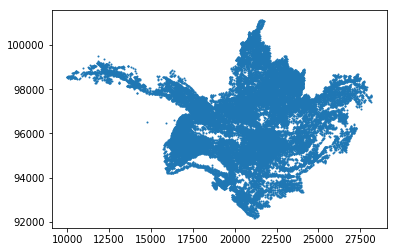

In [20]:
plt.scatter(cities_x, cities_y, s=1)

In [46]:
from decimal import *

In [47]:
getcontext().prec = 5

In [48]:
from decimal import Decimal

cities_x = [Decimal(x.split(" ")[1]) for x in data]
cities_y = [Decimal(x.split(" ")[2]) for x in data]
total_dist = 0
visitedNodes = set()
i=0
rlist = []
pbar = tqdm(total = len(cities_x))

while len(visitedNodes) != len(cities_x):
    visitedNodes.add(i)
    pbar.update(1)
    x, y = cities_x[i], cities_y[i]
    
    
    dist_x = [(x-c)**2 for c in cities_x]
    dist_y = [(y-c)**2 for c in cities_y]
    dist = [(dist_x[c] + dist_y[c]).sqrt() for c in range(len(dist_x))]#round to fix rounding issues
    for nn in [i[0] for i in sorted(enumerate(dist), key=lambda x:x[1])]:
        
        
        if nn not in visitedNodes:
            #distance = math.sqrt(dist_x[nn]**1 + dist_y[nn]**1)
            #distance = math.sqrt( ((cities_x[i] - cities_x[nn])**2) + ((cities_x[i] - cities_x[nn])**2) )
            distance = dist[nn]
            total_dist += distance
            
            rlist.append(i+1)
            i=nn
            break
total_dist += ((cities_x[0] - cities_x[i])**2 + (cities_x[0] - cities_x[i])**2).sqrt()
print(total_dist)

rstr = "1 3 2 5 6 7 9 11 10 12 13 8 4 15 14 16 17 18 19 21 23 25 27 29 32 35 37 38 39 41 43 46 47 50 42 33 26 24 22 20 28 31 30 34 36 40 44 45 48 49".split()
print([int(x) for x in rstr][:-1] == rlist)

KeyboardInterrupt: 